In [168]:
import pandas as pd 
import sklearn
import matplotlib as plt  
import seaborn as sns

In [169]:
column_names = [    
"passenger_id",
"survived",
"passenger_class",
"passenger_name",
"sex",
"age",
"no_sibling_spouses",
"no_parents_children",
"ticket",
"fare",
"cabin",
"embarked",
]
df = (
    pd
    .read_csv("../../database/titanic.csv", header=None, skiprows=1, names=column_names)
    .drop(columns=["passenger_id","passenger_name","ticket", "cabin"])  
    .astype({"passenger_class": "object"})
)
df.head(5)

,survived,passenger_class,sex,age,no_sibling_spouses,no_parents_children,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [170]:
df.describe()

,survived,age,no_sibling_spouses,no_parents_children,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
df.describe(include="object")

,passenger_class,sex,embarked
count,891,891,889
unique,3,2,3
top,3,male,S
freq,491,577,644


In [174]:
from sklearn.impute import SimpleImputer 
import numpy as np
df["age"] = df["age"].fillna(value=df["age"].mean()) 
df["embarked"] = df["embarked"].fillna("S")
df.head()

,survived,passenger_class,sex,age,no_sibling_spouses,no_parents_children,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='passenger_class', ylabel='percent'>

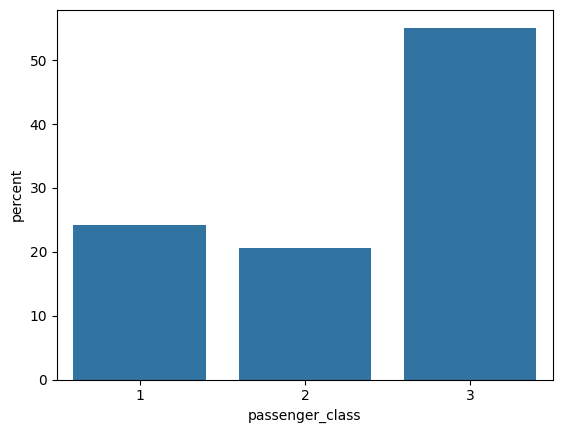

In [176]:
sns.countplot(df, x="passenger_class", stat="percent")

<Axes: xlabel='no_parents_children', ylabel='percent'>

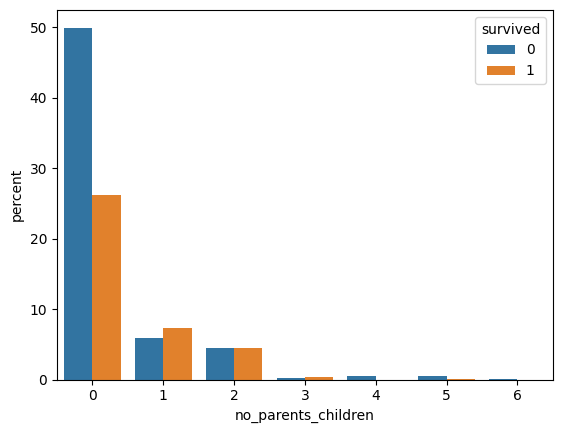

In [178]:
sns.countplot(df, x="no_parents_children", hue="survived", stat="percent")

In [179]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ["age", "no_sibling_spouses","no_parents_children","fare"]
scaler = StandardScaler()
scaler.fit(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns]) 

df.head()

,survived,passenger_class,sex,age,no_sibling_spouses,no_parents_children,fare,embarked
0,0,3,male,-0.592481,0.432793,-0.473674,-0.502445,S
1,1,1,female,0.638789,0.432793,-0.473674,0.786845,C
2,1,3,female,-0.284663,-0.474545,-0.473674,-0.488854,S
3,1,1,female,0.407926,0.432793,-0.473674,0.420730,S
4,0,3,male,0.407926,-0.474545,-0.473674,-0.486337,S


In [180]:
categorical_columns = list(set(df.columns) - set(numerical_columns) - {"survived"})
df_encoded = pd.get_dummies(df[list(set(df.columns) - set(numerical_columns) - {"survived"})],drop_first=True) 
df_encoded.head()

,embarked_Q,embarked_S,sex_male,passenger_class_2,passenger_class_3
0,False,True,True,False,True
1,False,False,False,False,False
2,False,True,False,False,True
3,False,True,False,False,False
4,False,True,True,False,True


In [181]:
df_ml = (pd
         .concat([df,df_encoded],axis="columns")
         .drop(columns=categorical_columns)
         .rename(columns={"survived": "y"})
)
df_ml.head()

,y,age,no_sibling_spouses,no_parents_children,fare,embarked_Q,embarked_S,sex_male,passenger_class_2,passenger_class_3
0,0,-0.592481,0.432793,-0.473674,-0.502445,False,True,True,False,True
1,1,0.638789,0.432793,-0.473674,0.786845,False,False,False,False,False
2,1,-0.284663,-0.474545,-0.473674,-0.488854,False,True,False,False,True
3,1,0.407926,0.432793,-0.473674,0.420730,False,True,False,False,False
4,0,0.407926,-0.474545,-0.473674,-0.486337,False,True,True,False,True


In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ml.drop(columns=["y"]), df_ml[["y"]], test_size=0.2, random_state=420)
print(X_train.shape, y_train.shape)

(712, 9) (712, 1)


In [183]:
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

/Users/barteoo/Documents/TitanicApp/ml-client/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8324022346368715

In [184]:
import pickle
with open("../model.pkl", "wb") as file:
    pickle.dump(model,file)